In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

Database Info
URL : https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales

In [20]:
df = pd.read_csv("/content/Ice Cream Sales - temperatures.csv")

df.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


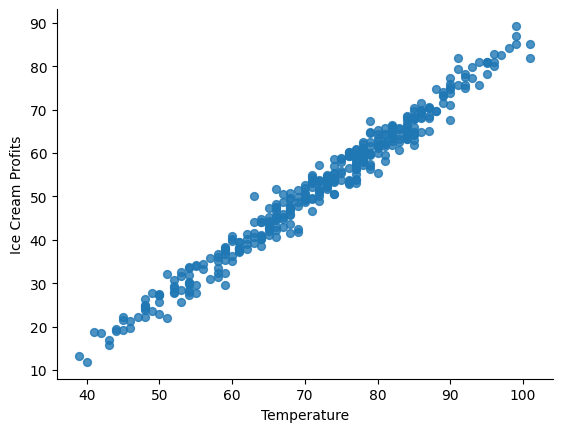

In [21]:
# @title Temperature vs Ice Cream Profits

df.plot(kind='scatter', x='Temperature', y='Ice Cream Profits', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Entrenamos modelo

Epoch 1/1000
10/10 [==============================] - 0s 3ms/step - loss: 3119.8142
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 3038.1282
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 2957.4619
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 2878.1963
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 2800.5903
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 2724.5964
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 2650.2295
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 2577.4927
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 2506.0132
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 2436.2678
Epoch 11/1000
10/10 [==============================] - 0s 3ms/step - loss: 2368.4119
Epoch 12/1000
10/10 [==============================] - 0s 5ms/step - loss:

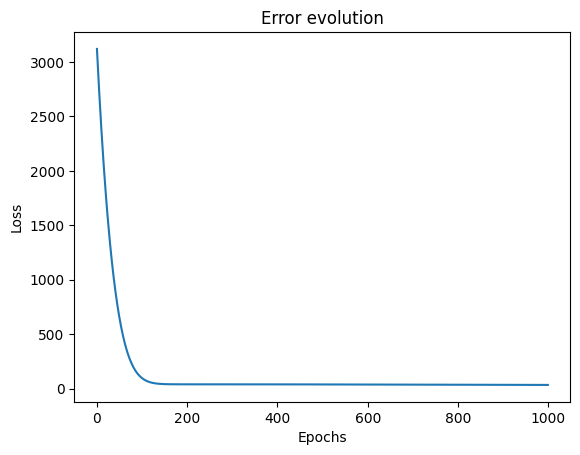

In [22]:
# Data train

X = np.array(df["Temperature"].tolist())
Y = np.array(df["Ice Cream Profits"].tolist())

#Divide data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define keras model
model = Sequential()
model.add(Dense(1, input_shape=(1,)))  # Hacemos una neurona
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, Y_train, epochs=1000)


#Take mse from model
losses = history.history['loss']

# Plot error evolution
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.title("Error evolution")
plt.show()



3/3 [==============================] - 0s 5ms/step


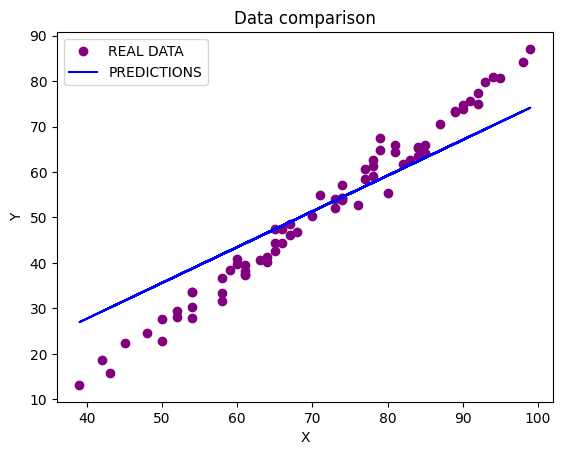

In [24]:

Y_pred = model.predict(X_test)

mse = np.mean((Y_test - Y_pred.squeeze())**2)

#Plot comparison
plt.plot(X_test, Y_test, "o", color="purple", label="REAL DATA")
plt.plot(X_test, Y_pred, "b-", label = "PREDICTIONS")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data comparison")
plt.show()